<h1>Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("SUV_prediction.csv")

In [3]:
print(data.head(5))
print("Number of peoples: ", len(data.index))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Number of peoples:  400


<h1>Analyzing Data

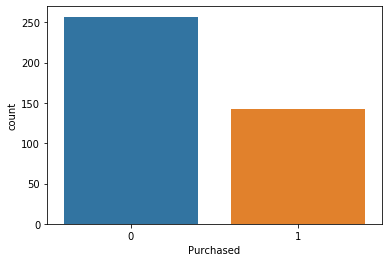

In [4]:
%matplotlib inline
sns.countplot(x = "Purchased", data = data)

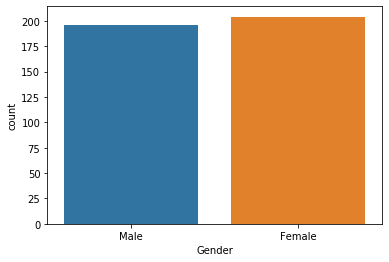

In [5]:
sns.countplot(x = "Gender", data = data)

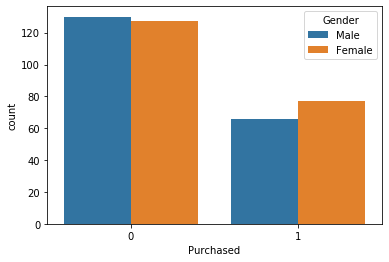

In [6]:
sns.countplot(x  = "Purchased", hue = "Gender", data = data)

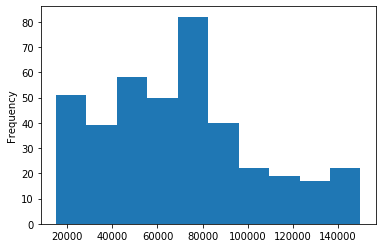

In [7]:
data["EstimatedSalary"].plot.hist()

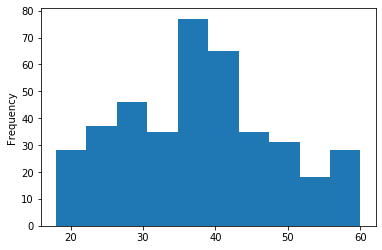

In [8]:
data["Age"].plot.hist()

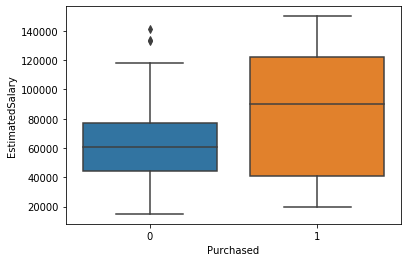

In [9]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", data = data)

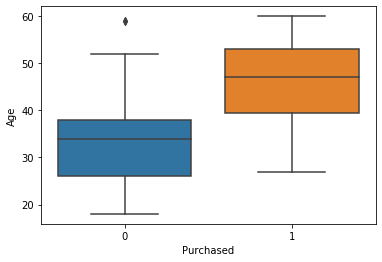

In [10]:
sns.boxplot(x = "Purchased", y = "Age", data = data)

In [11]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<h1>Data Wrangling

In [12]:
Gender = pd.get_dummies(data["Gender"], drop_first = True)
Gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [13]:
data = pd.concat([data, Gender], axis = 1)

In [14]:
data.drop(["User ID", "Gender"], axis = 1, inplace = True)

In [15]:
data.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<h1> Building Model and Predicting the purchase

In [16]:
model = LogisticRegression()

In [17]:
x = data.drop("Purchased", axis = 1)
y = data["Purchased"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [19]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)

/home/yuvraj/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
accuracy_score(y_test, prediction)

0.5833333333333334

<h1>Conclusion

Prediction Accuracy of our model is around 58.3%. Which is quite low.